##Table of contents:
* Example: Twitter Analysis during the Russian-Ukraine Crisis
  * Data Preprocessing
  * EDA
  * Feature Extraction
  * ML Model Predictions
  * Evaluation
  ##Explanation on what we are looking out for:
* What are we trying to tackle?
  *  Indulge in such a topic where we analyse the emotions of the general public as tensions
continued to arise between Russian and Ukraine supporters. Therefore, we are doing sentiment analysis on
the Ukraine-Russia War on Twitter.
* Objectives:
  * Identify the mental state of the general public based on the comments extracted from the tweets on Twitter
  * Understand how this conflict has affected the general public using sentiment analysis
  * Data Source: https://www.kaggle.com/datasets/towhidultonmoy/russia-vs-ukraine-tweets-datasetdaily-updated
* Evaluation Method
  * Logistic Regression
    * Divide the training set into the relative emotions expressed in the tweets. Then, it counts all the words and makes a python dictionary of their frequencies of the positive and negative emotions.
  * Decision Tree Classifier
    * Supervised learning approach used in data mining
    * Used as a predictive model to draw conclusions based on a set of observations
    * Evaluation metrics
  * Precision
  * Recall
  * F-score
  * Accuracy is an evaluation metric that allows you to measure the total number of predictions a model gets right

In [ ]:
# For dataframes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing all nltk (natural language Toolkit) related libraries
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('all')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression

#To get subjectivity and polarity, import textblob
from textblob import TextBlob

# importing Regular Expressions
import re
import string

# Bag of Words representation
from sklearn.feature_extraction.text import CountVectorizer

#Wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Logistic Regression
from sklearn.model_selection import train_test_split, cross_val_score,StratifiedShuffleSplit
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Grid Search
from sklearn.model_selection import GridSearchCV

#LinearSVC
from sklearn.svm import LinearSVC

#SGD classifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# MultinomialNB
from sklearn.naive_bayes import MultinomialNB

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

#To ignore warning
import warnings
warnings.filterwarnings("ignore")

#Emotion
!pip install nrclex
from nrclex import NRCLex

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 396 kB 6.8 MB/s 
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43329 sha256=322e343c77bab82f12daf694b6a0d3ae79e33018c7c0d69b9cb2a38d4260a15b
  Stored in directory: /root/.cache/pip/wheels/af/2c/9c/dfa19d1b65326c520b32850a9311f6d4eda679ac04dba26081
Successfully built nrclex


In [ ]:
data_sentiment = pd.read_csv("ukrainerussian_csv.csv")

In [ ]:
data_sentiment.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [ ]:
data_sentiment["tweet"]

0        @jensstoltenberg Nato/otan is the most terrori...
1        @bjovan3 @KimDotcom You’re talking as if it wa...
2        @Trollstoy88 Bet russia wishes it hadnt wasted...
3        On the last meeting Lukashenko and Putin talki...
4        @hrkbenowen Why wouldn't he be? Russia (not th...
                               ...                        
10004    Ukraine has won the war. Russia is leaving Ukr...
10005    Biden says it remains to be seen if the Kherso...
10006    Talks with Russia? No way, say Ukrainians | Ru...
10007    @DylanBurns1776 Supporting kurds to sow divisi...
10008    @Breaking911 I voted for him last time, can’t ...
Name: tweet, Length: 10009, dtype: object

In [ ]:
unprocessed_tweet_data = pd.DataFrame({'Tweet':pd.Series(data_sentiment['tweet']),'Language tweet was in': pd.Series(data_sentiment['language'])})

In [ ]:
unprocessed_tweet_data.head()

,Tweet,Language tweet was in
0,@jensstoltenberg Nato/otan is the most terrori...,en
1,@bjovan3 @KimDotcom You’re talking as if it wa...,en
2,@Trollstoy88 Bet russia wishes it hadnt wasted...,en
3,On the last meeting Lukashenko and Putin talki...,en
4,@hrkbenowen Why wouldn't he be? Russia (not th...,en


In [ ]:
print(unprocessed_tweet_data["Language tweet was in"].unique())

['en' 'qme' 'pt' 'nl' 'it' 'ca' 'in' 'und' 'ta' 'ja' 'fr' 'zh' 'vi' 'ro'
 'th' 'de' 'ht' 'es' 'qht' 'ur' 'ru' 'fi' 'ar' 'cs' 'pl' 'hi' 'tl' 'tr'
 'no' 'et' 'uk' 'el' 'da' 'qam' 'iw' 'sv' 'lt' 'bg']


In [ ]:
print(unprocessed_tweet_data["Language tweet was in"].value_counts())

en     8793
pt      343
it      232
qme     138
und      80
in       54
th       53
es       38
vi       37
ru       36
ca       34
de       27
ja       26
fr       25
nl       13
ar       11
qht       9
fi        8
pl        6
ro        5
zh        5
et        4
cs        4
uk        4
hi        4
tl        4
no        2
ht        2
tr        2
qam       2
lt        1
sv        1
iw        1
ur        1
da        1
el        1
ta        1
bg        1
Name: Language tweet was in, dtype: int64


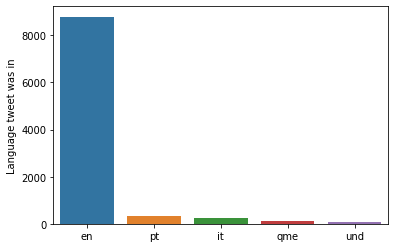

In [ ]:
sns.barplot(x= unprocessed_tweet_data['Language tweet was in'].value_counts()[:5].index, y=unprocessed_tweet_data['Language tweet was in'].value_counts()[:5])

In [ ]:
eng=unprocessed_tweet_data[unprocessed_tweet_data["Language tweet was in"]=='en']

In [ ]:
eng

,Tweet,Language tweet was in
0,@jensstoltenberg Nato/otan is the most terrori...,en
1,@bjovan3 @KimDotcom You’re talking as if it wa...,en
2,@Trollstoy88 Bet russia wishes it hadnt wasted...,en
3,On the last meeting Lukashenko and Putin talki...,en
4,@hrkbenowen Why wouldn't he be? Russia (not th...,en
...,...,...
10004,Ukraine has won the war. Russia is leaving Ukr...,en
10005,Biden says it remains to be seen if the Kherso...,en
10006,"Talks with Russia? No way, say Ukrainians | Ru...",en
10007,@DylanBurns1776 Supporting kurds to sow divisi...,en


In [ ]:
lemmatizer = WordNetLemmatizer()
stopword = set(stopwords.words('english'))

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# Processing Tweet data
def tweet_processor(tweet_data):
  #Changing all tweet texts to be lowercase
  tweet_data = str(tweet_data).lower()

  #Removing punctuation
  tweet_data = re.sub('\[.*?\]', '', tweet_data)

  #Removing random standalone alphabets
  tweet_data = re.sub("[^a-z\s]", "", tweet_data)

  #Removing hashtags
  tweet_data = re.sub("#", " ", tweet_data)

  #Removing RT
  tweet_data = re.sub("RT[\s]+", "", tweet_data)

  #Removing hyperlinks
  tweet_data = re.sub('https?://\S+|www\.\S+', '', tweet_data)

  tweet_data = re.sub('<.*?>+', '', tweet_data)

  tweet_data = re.sub('[%s]' % re.escape(string.punctuation), '', tweet_data)

  #Removing lines separated by \n
  tweet_data = re.sub('\n', '', tweet_data)

  tweet_data = re.sub('\w*\d\w*', '', tweet_data) #second code satisfy those conditions that weren't covered in the first line of code (Above)

  #Removing stopwords
  tweet_data = [word for word in tweet_data.split(' ') if word not in stopword]
  tweet_data =" ".join(tweet_data)
  #.split(' ') splits the sentence by the empty spaces
  #' '.join joins all the data in tweet data with a single spacing

  #Lemmatize
  tweet_data = [lemmatizer.lemmatize(word) for word in tweet_data.split(' ')]
  tweet_data=" ".join(tweet_data)
  #tweet_data=",".join([str(i) for i in tweet_data])
  return tweet_data

In [ ]:
processed_tweet_data =

In [ ]:
def getSubjectivity(text):
  return(TextBlob(text).sentiment.subjectivity)

In [ ]:
def getPolarity(text):
  return(TextBlob(text).sentiment.polarity)

In [ ]:
unprocessed_tweet_data["subjectivity"]=unprocessed_tweet_data['Tweet'].apply(getSubjectivity)
unprocessed_tweet_data["polarity"]=unprocessed_tweet_data['Tweet'].apply(getPolarity)

In [ ]:
unprocessed_tweet_data

,Tweet,Language tweet was in,subjectivity,polarity
0,@jensstoltenberg Nato/otan is the most terrori...,en,0.488636,0.159091
1,@bjovan3 @KimDotcom You’re talking as if it wa...,en,0.644444,0.325000
2,@Trollstoy88 Bet russia wishes it hadnt wasted...,en,0.000000,-0.200000
3,On the last meeting Lukashenko and Putin talki...,en,0.533333,0.250000
4,@hrkbenowen Why wouldn't he be? Russia (not th...,en,0.000000,0.000000
...,...,...,...,...
10004,Ukraine has won the war. Russia is leaving Ukr...,en,0.500000,-0.200000
10005,Biden says it remains to be seen if the Kherso...,en,0.750000,0.250000
10006,"Talks with Russia? No way, say Ukrainians | Ru...",en,0.000000,0.000000
10007,@DylanBurns1776 Supporting kurds to sow divisi...,en,0.375000,0.375000


In [ ]:
def getComputation(score):
    if score < -0.5:
        return 'Very Negative'
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    elif score > 0:
        return 'Positive'
unprocessed_tweet_data['Computation_Analysis'] = unprocessed_tweet_data['polarity'].apply(getComputation)

In [ ]:
unprocessed_tweet_data

,Tweet,Language tweet was in,subjectivity,polarity,Computation_Analysis
0,@jensstoltenberg Nato/otan is the most terrori...,en,0.488636,0.159091,Positive
1,@bjovan3 @KimDotcom You’re talking as if it wa...,en,0.644444,0.325000,Positive
2,@Trollstoy88 Bet russia wishes it hadnt wasted...,en,0.000000,-0.200000,Negative
3,On the last meeting Lukashenko and Putin talki...,en,0.533333,0.250000,Positive
4,@hrkbenowen Why wouldn't he be? Russia (not th...,en,0.000000,0.000000,Neutral
...,...,...,...,...,...
10004,Ukraine has won the war. Russia is leaving Ukr...,en,0.500000,-0.200000,Negative
10005,Biden says it remains to be seen if the Kherso...,en,0.750000,0.250000,Positive
10006,"Talks with Russia? No way, say Ukrainians | Ru...",en,0.000000,0.000000,Neutral
10007,@DylanBurns1776 Supporting kurds to sow divisi...,en,0.375000,0.375000,Positive


<function matplotlib.pyplot.show(*args, **kw)>

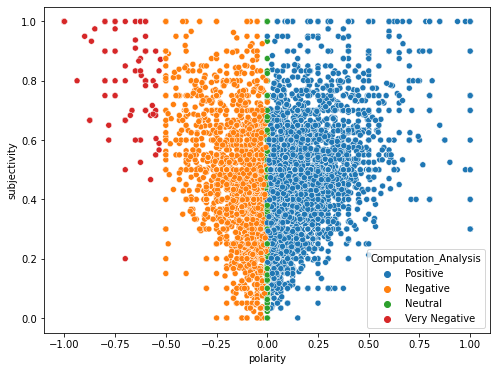

In [ ]:
fig, ax=plt.subplots(figsize=(8,6))
sns.scatterplot(x='polarity',y='subjectivity',hue='Computation_Analysis',data=unprocessed_tweet_data)
plt.show

In [ ]:
posTweets = unprocessed_tweet_data[unprocessed_tweet_data.Computation_Analysis=='Positive']
posTweets=posTweets['Tweet']
round((posTweets.shape[0]/unprocessed_tweet_data.shape[0]*100),1)

38.5

In [ ]:
negTweets = unprocessed_tweet_data[unprocessed_tweet_data.Computation_Analysis=='Negative']
negTweets=negTweets['Tweet']
round((negTweets.shape[0]/unprocessed_tweet_data.shape[0]*100),1)

21.0

In [ ]:
vnegTweets = unprocessed_tweet_data[unprocessed_tweet_data.Computation_Analysis=='Very Negative']
vnegTweets=vnegTweets['Tweet']
round((vnegTweets.shape[0]/unprocessed_tweet_data.shape[0]*100),1)

1.5

In [ ]:
neuTweets = unprocessed_tweet_data[unprocessed_tweet_data.Computation_Analysis=='Neutral']
neuTweets=neuTweets['Tweet']
round((neuTweets.shape[0]/unprocessed_tweet_data.shape[0]*100),1)

39.0